<a href="https://colab.research.google.com/github/gowthamp-04/Data-Analytics/blob/main/Google_Search_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pytrends

In [2]:
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import time

Trending_topics = TrendReq(hl='en-US', tz=360)

In [14]:
kw_list=["Cloud Computing"]
Trending_topics.build_payload(kw_list,cat=0, timeframe='today 12-m')#category
# time.sleep(5)

In [15]:
data = Trending_topics.interest_over_time()
data = data.sort_values(by="Cloud Computing", ascending = False)
data = data.head(10)
print(data)

            Cloud Computing  isPartial
date                                  
2024-01-28              100      False
2023-12-17               96      False
2024-05-19               96      False
2024-02-18               95      False
2024-11-17               93      False
2024-02-04               93      False
2024-02-11               93      False
2024-05-05               93      False
2024-01-21               92      False
2024-03-17               92      False


/usr/local/lib/python3.10/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


In [19]:
kw_list = ["Cloud Computing"]
Trending_topics.build_payload(kw_list, cat=0, timeframe='2018-01-01 2018-02-01', geo='', gprop='')
data = Trending_topics.interest_over_time()
data = data.sort_values(by="Cloud Computing", ascending = False)
data = data.head(10)
print(data)

            Cloud Computing  isPartial
date                                  
2018-01-30              100      False
2018-01-18              100      False
2018-02-01               97      False
2018-01-11               93      False
2018-01-08               93      False
2018-01-04               92      False
2018-01-22               92      False
2018-01-24               91      False
2018-01-10               91      False
2018-01-03               90      False


In [20]:
data = Trending_topics.interest_by_region()
data = data.sort_values(by="Cloud Computing", ascending = False)
data = data.head(10)
print(data)

                        Cloud Computing
geoName                                
British Virgin Islands              100
Ethiopia                              5
Cameroon                              2
Nepal                                 2
India                                 2
St. Helena                            2
Kenya                                 1
Pakistan                              1
China                                 1
Myanmar (Burma)                       1


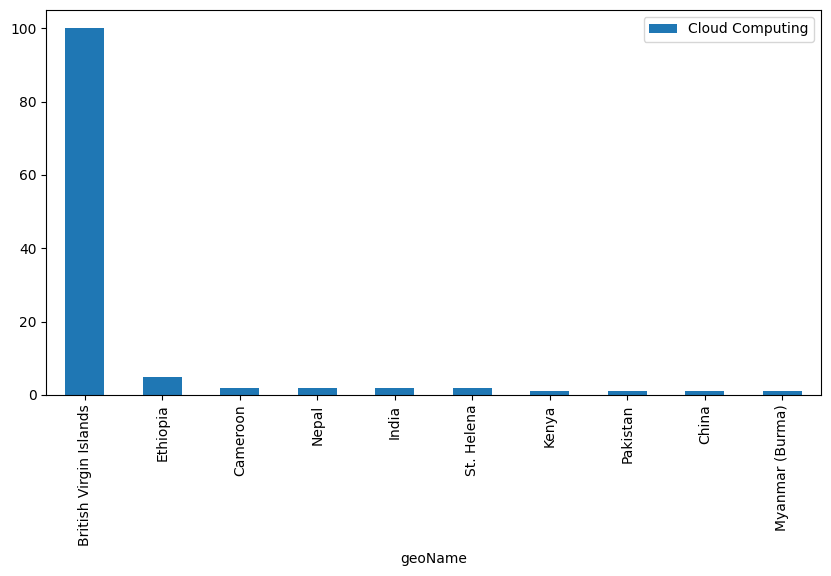

In [21]:
data.reset_index().plot(x='geoName', y='Cloud Computing',figsize=(10,5), kind="bar")
plt.style.use('fivethirtyeight')
plt.show()

In [22]:
df = Trending_topics.top_charts(2020, hl='en-US', tz=300, geo='GLOBAL')
df.head(10)

,title,exploreQuery
0,Coronavirus,
1,Election results,
2,Kobe Bryant,
3,Zoom,
4,IPL,
5,India vs New Zealand,
6,Coronavirus update,
7,Coronavirus symptoms,
8,Joe Biden,
9,Google Classroom,


In [23]:
try:
    Trending_topics.build_payload(kw_list=['Cloud Computing'])
    related_queries = Trending_topics.related_queries()
    related_queries.values()
except (KeyError, IndexError):
    print("No related queries found for 'Cloud Computing'")

No related queries found for 'Cloud Computing'


In [24]:
keywords = Trending_topics.suggestions(keyword='Cloud Computing')
df = pd.DataFrame(keywords)
df.drop(columns= 'mid')

,title,type
0,Cloud computing,Topic
1,Cloud computing,Topic
2,Cloud computing security,Topic
3,Alibaba Cloud,Computer software company
4,Private cloud computing infrastructure,Topic
